# Analyses of Trait TPCs

In [1]:
############### Analyses of Trait TPCs ################

rm(list=ls())
graphics.off()
unlink("../results/*") # remove all existing results files
unlink("../results/Figs/*") # remove all existing results plots
unlink("../results/SI/*")

require('tidyverse')
require('ggtext')
require('cowplot')
require('patchwork')

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: ggtext

Loading required package: cowplot

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




## Development rate (1/$\alpha$)

In [2]:
# load in raw data
df <- as_tibble(read.csv('../data/TraitData.csv')) 
dv <- df %>% select(interactor1, interactor1temp, standardisedtraitname, standardisedtraitvalue) %>%
  rename(species = interactor1, temp = interactor1temp, alpha = standardisedtraitvalue) %>%
  filter(standardisedtraitname == '1/alpha', alpha != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,alpha
<chr>,<dbl>,<chr>,<dbl>
Acyrthosiphon pisum,10,1/alpha,0.04694836
Acyrthosiphon pisum,15,1/alpha,0.08196721
Acyrthosiphon pisum,20,1/alpha,0.12048193
Acyrthosiphon pisum,25,1/alpha,0.14925373
Acyrthosiphon pisum,30,1/alpha,0.15384615
Paracoccus marginatus,15,1/alpha,0.00100000


In [3]:
#load in predictions and invert alpha (1/alpha)

AlphaPredictions <- as_tibble(read_csv('../data/AlphaPredictions.csv')) %>% 
  mutate(alpha = 1/alpha, alphaLwr = 1/alphaLwr, alphaUpr = 1/alphaUpr)

head(AlphaPredictions)

Rows: 45000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, alpha, alphaLwr, alphaUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,alpha,alphaLwr,alphaUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aedes albopictus,1/alpha,0.00000000,0.003707215,0.0008631335,0.006941101
1,Aedes albopictus,1/alpha,0.04504505,0.003729764,0.0008708560,0.006975826
1,Aedes albopictus,1/alpha,0.09009009,0.003752444,0.0008786449,0.007010712
1,Aedes albopictus,1/alpha,0.13513514,0.003775253,0.0008865009,0.007045170
1,Aedes albopictus,1/alpha,0.18018018,0.003798194,0.0008944245,0.007079607
1,Aedes albopictus,1/alpha,0.22522523,0.003821266,0.0009024163,0.007114200


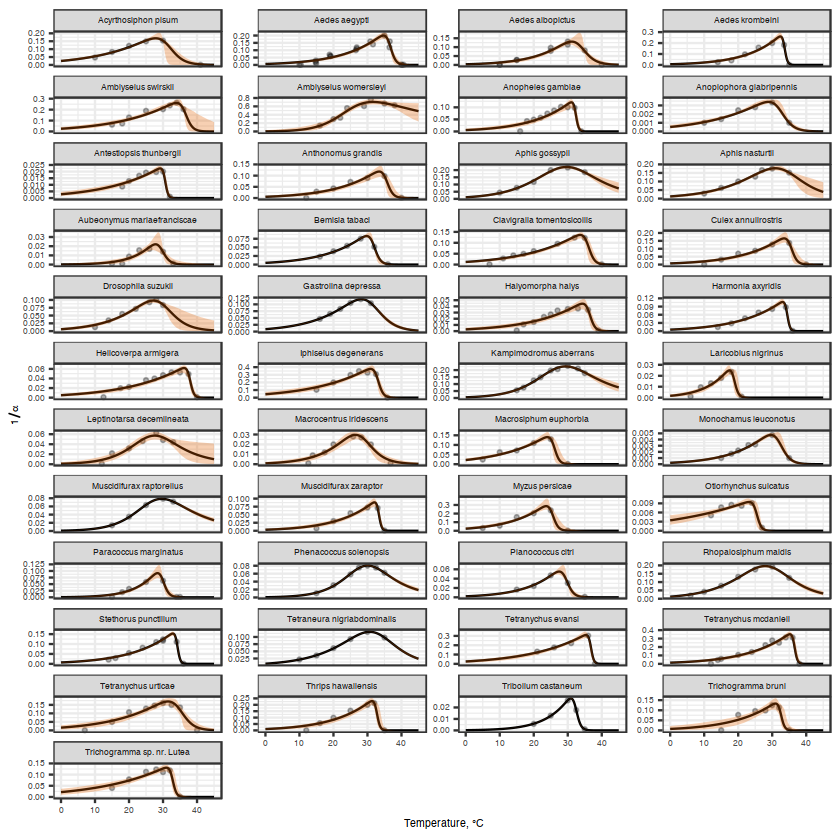

In [4]:
AlphaPlot <- ggplot(AlphaPredictions) +
  geom_line(aes(temp, alpha)) +
  geom_point(aes(temp, alpha), dv, size = 0.75, alpha =0.3) +
  facet_wrap(~species, scales = 'free_y', ncol = 4) +
  theme_bw()+
  geom_ribbon(aes(temp, ymin=alphaLwr, ymax=alphaUpr), AlphaPredictions, fill="#e66101",alpha=0.3,
              inherit.aes = T)+
  theme(text = element_text(size=6, family='Times'), strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(1/alpha)), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')
  
AlphaPlot

save_plot(AlphaPlot, file="../results/SI/AlphaFits.pdf", base_height=20,base_width = 14, base_asp = 0.75,units="cm")

## Fecundity ($b_{max}$)

In [5]:
# fecundity 

dv <- df %>% select(interactor1, interactor1temp, standardisedtraitname, standardisedtraitvalue) %>%
  rename(species = interactor1, temp = interactor1temp, bmax = standardisedtraitvalue) %>%
  filter(standardisedtraitname == 'bmax', bmax != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,bmax
<chr>,<dbl>,<chr>,<dbl>
Acyrthosiphon pisum,10,bmax,2.330
Acyrthosiphon pisum,15,bmax,4.567
Acyrthosiphon pisum,20,bmax,6.188
Acyrthosiphon pisum,25,bmax,6.771
Acyrthosiphon pisum,30,bmax,2.250
Paracoccus marginatus,15,bmax,0.001


In [6]:
# load in predictions
bmaxPredictions <- as_tibble(read_csv('../data/BetaPredictions.csv'))

head(bmaxPredictions)

Rows: 37000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, bmax, bmaxLwr, bmaxUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,bmax,bmaxLwr,bmaxUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
10,Bemisia tabaci,bmax,0.00000000,0.9231514,0.1538183,3.059243
10,Bemisia tabaci,bmax,0.04504505,0.9267665,0.1549095,3.064576
10,Bemisia tabaci,bmax,0.09009009,0.9303947,0.1560080,3.069917
10,Bemisia tabaci,bmax,0.13513514,0.9340358,0.1571139,3.075266
10,Bemisia tabaci,bmax,0.18018018,0.9376900,0.1582274,3.080622
10,Bemisia tabaci,bmax,0.22522523,0.9413573,0.1593483,3.085985


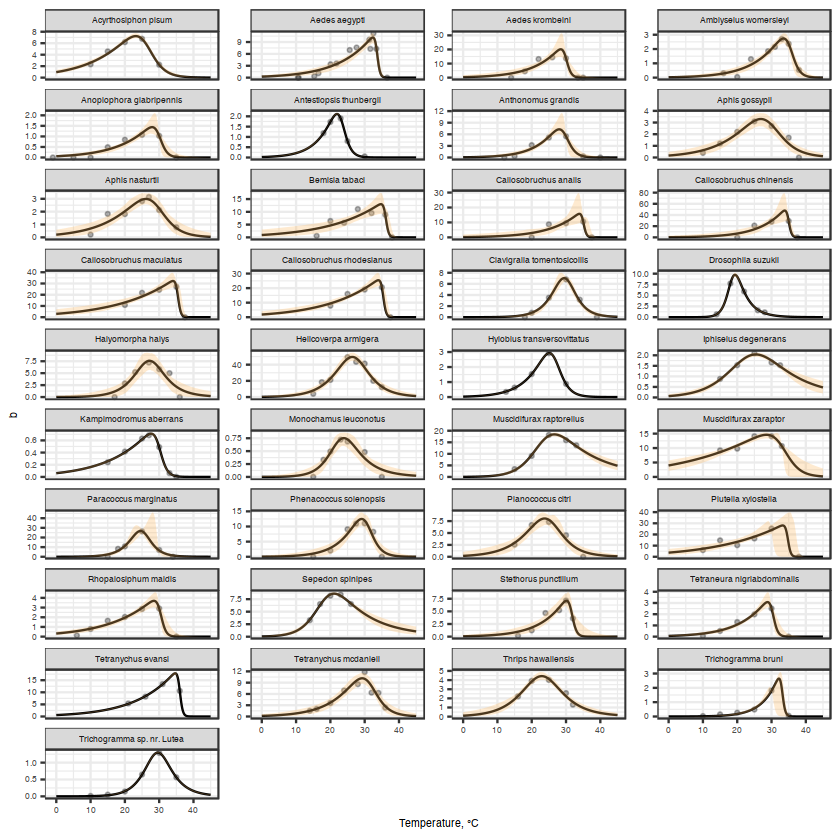

In [7]:
bmaxPlot <- ggplot(bmaxPredictions) +
  geom_line(aes(temp, bmax)) +
  geom_point(aes(temp, bmax), dv, size = 0.75, alpha =0.3) +
  facet_wrap(~species, scales = 'free_y', ncol = 4) +
  theme_bw() +
  geom_ribbon(aes(temp, ymin=bmaxLwr, ymax=bmaxUpr), bmaxPredictions, fill="#fdb863",alpha=0.3,
              inherit.aes = T)+
  theme(text = element_text(size=6, family='Times'))+
  theme(strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(b)[max]), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none'); bmaxPlot


save_plot(bmaxPlot, file="../results/SI/bmaxFits.pdf",  
          base_height=18,base_width = 14, base_asp = 0.75,units="cm")

## Juvenile mortality rate ($z_J$) 

In [8]:
dv <- df %>% rename(temp = interactor1temp, species = interactor1, zj = standardisedtraitvalue) %>%
  select(species, temp, standardisedtraitname, zj) %>% 
  filter(standardisedtraitname == 'zj', zj != 'NA') %>%
  filter(species != 'Amblyseius womersleyi' & species != 'Clavigralla tomentosicollis') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,zj
<chr>,<dbl>,<chr>,<dbl>
Acyrthosiphon pisum,10,zj,0.010
Acyrthosiphon pisum,15,zj,0.004
Acyrthosiphon pisum,20,zj,0.022
Acyrthosiphon pisum,25,zj,0.051
Acyrthosiphon pisum,30,zj,0.131
Paracoccus marginatus,15,zj,0.020


In [9]:
# load in predictions
zJPredictions <- as_tibble(read_csv('../data/zJPredictions.csv'))

# truncate fits for plotting 
zJPredictions <- zJPredictions %>%
  mutate_at(vars(c(zj)), 
            ~ifelse(zj > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zjLwr)), 
            ~ifelse(zjLwr > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zjUpr)), 
            ~ifelse(zjUpr > 0.2, 0.2, .)) 

zJPredictions <- zJPredictions %>% filter(zj < 0.2)

head(zJPredictions)

Rows: 26000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, zj, zjLwr, zjUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,zj,zjLwr,zjUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Thrips hawaiiensis,zj,7.477477,0.1993686,0.2,0.1556077
1,Thrips hawaiiensis,zj,7.522523,0.1977676,0.2,0.1545784
1,Thrips hawaiiensis,zj,7.567568,0.1961801,0.2,0.1535564
1,Thrips hawaiiensis,zj,7.612613,0.1946060,0.2,0.1525415
1,Thrips hawaiiensis,zj,7.657658,0.1930451,0.2,0.1515362
1,Thrips hawaiiensis,zj,7.702703,0.1914974,0.2,0.1505278


Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


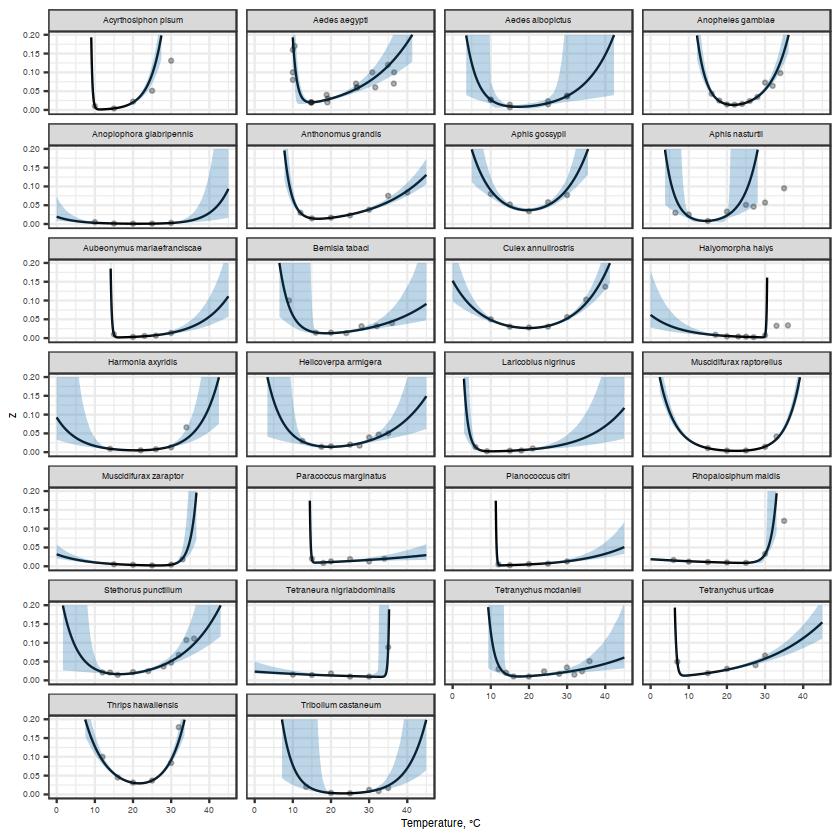

In [10]:
zJPlot <- ggplot(zJPredictions) +
  geom_line(aes(temp, zj)) +
  geom_point(aes(temp, zj), dv, size = 0.75, alpha =0.3) +
  scale_y_continuous(limits=c(-0.001,0.2))+
  facet_wrap(~species, ncol = 4) +
  theme_bw() +
  geom_ribbon(aes(temp, ymin=zjLwr, ymax=zjUpr), zJPredictions, fill="#1f78b4",alpha=0.3,
              inherit.aes = F)+
  theme(text = element_text(size=6, family='Times'))+theme(strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(z[J])), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

zJPlot

save_plot(zJPlot, file="../results/SI/zJFits.pdf", 
          base_height=20,base_width = 14, base_asp = 0.75,units="cm")

## Adult mortality rate ($z$)

In [11]:

dv <- df %>% rename(temp = interactor1temp, species = interactor1, z = standardisedtraitvalue) %>%
  select(species, temp, standardisedtraitname, z) %>% 
  filter(standardisedtraitname == 'z', z != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,z
<chr>,<dbl>,<chr>,<dbl>
Acyrthosiphon pisum,10,z,0.02652520
Acyrthosiphon pisum,15,z,0.03831418
Acyrthosiphon pisum,20,z,0.06329114
Acyrthosiphon pisum,25,z,0.09174312
Acyrthosiphon pisum,30,z,0.12048193
Paracoccus marginatus,15,z,0.03000000


In [12]:
#load in predictions
zPredictions <- as_tibble(read_csv('../data/zPredictions.csv'))

# truncate for plotting 
zPredictions <- zPredictions %>%
  mutate_at(vars(c(z)), 
            ~ifelse(z > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zLwr)), 
            ~ifelse(zLwr > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zUpr)), 
            ~ifelse(zUpr > 0.2, 0.2, .)) 

zPredictions <- zPredictions %>% filter(z < 0.2)

head(zPredictions)

Rows: 29000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, z, zLwr, zUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,z,zLwr,zUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Culex pipiens,z,15.22523,0.19127608,0.18928469,0.01126646
1,Culex pipiens,z,15.27027,0.15843122,0.15715605,0.01124126
1,Culex pipiens,z,15.31532,0.13136945,0.13072983,0.01121631
1,Culex pipiens,z,15.36036,0.10907225,0.10928672,0.01118538
1,Culex pipiens,z,15.40541,0.09070075,0.09203781,0.01115188
1,Culex pipiens,z,15.45045,0.07556398,0.07715322,0.01111406


Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


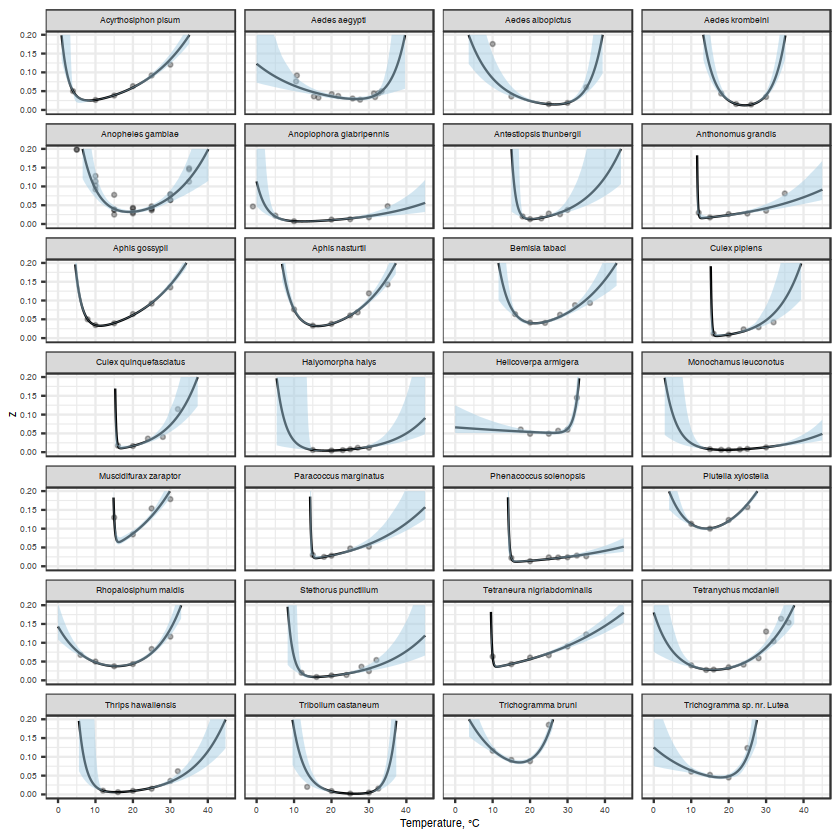

In [13]:
zPlot <- ggplot(zPredictions) +
  geom_line(aes(temp, z)) +
  geom_point(aes(temp, z), dv, size = 0.75, alpha =0.3) +
  facet_wrap(~species, ncol = 4)+
  scale_y_continuous(limits=c(-0.001,0.2))+
  theme_bw() +
  geom_ribbon(aes(temp, ymin=zLwr, ymax=zUpr), zPredictions, fill="#a6cee3",alpha=0.5,
              inherit.aes = T)+
  theme(text = element_text(size=6, family='Times'))+theme(strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(z)), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none'); zPlot

save_plot(zPlot, file="../results/SI/zFits.pdf", 
          base_height=20,base_width = 14, base_asp = 0.75,units="cm")

## Distributions of Trait $T_{pk}$s and activation energies

In [14]:
####### Distributions of Trait $T_{pk}$s and activation energies ####### 

# Tpks for all species

alpha   <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv', header = TRUE))
zj      <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv', header = TRUE))
z       <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv', header = TRUE))
bmax    <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv', header = TRUE))

topt  <- rbind(alpha,zj,z,bmax)

head(topt)

X,param,conf_lower,conf_upper,method,estimate,species,trait
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,rmax,0.1150297,0.1811818,residual bootstrap,0.1309269,Aedes albopictus,juvenile development rate
2,topt,29.5480246,33.5389922,residual bootstrap,31.1600000,Aedes albopictus,juvenile development rate
3,ctmin,-3.7980000,9.1885261,residual bootstrap,4.2840000,Aedes albopictus,juvenile development rate
4,ctmax,36.0853843,46.4508127,residual bootstrap,41.1210000,Aedes albopictus,juvenile development rate
5,thermal_safety_margin,2.6135491,16.8393778,residual bootstrap,9.9610000,Aedes albopictus,juvenile development rate
6,thermal_tolerance,31.1829741,44.1560000,residual bootstrap,36.8370000,Aedes albopictus,juvenile development rate


In [15]:
toptz <- subset(topt, topt$param=="topt")

toptz$species <- as.factor(toptz$species)
toptz$trait   <- as.factor(toptz$trait)

# levels(toptz$species)

toptz$trait <- fct_relevel(toptz$trait, "juvenile mortality rate")

toptz <- toptz %>% filter(param!= "rmax")

SpCount <- table(toptz$species)
RmSp <- names(SpCount)[which(SpCount==1)]

toptz <- filter(toptz, !(species %in% RmSp))

head(toptz)

X,param,conf_lower,conf_upper,method,estimate,species,trait
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>
2,topt,29.54802,33.53899,residual bootstrap,31.160,Aedes albopictus,juvenile development rate
12,topt,29.42668,30.65921,residual bootstrap,29.751,Bemisia tabaci,juvenile development rate
22,topt,30.51200,30.74325,residual bootstrap,30.648,Tetraneura nigriabdominalis,juvenile development rate
32,topt,32.77370,32.97266,residual bootstrap,32.875,Stethorus punctillum,juvenile development rate
41,topt,34.90443,35.74602,residual bootstrap,35.182,Tetranychus mcdanieli,juvenile development rate
50,topt,29.68936,33.56578,residual bootstrap,31.467,Tetranychus urticae,juvenile development rate


In [16]:
# change name to add asterisk to match next fig
toptz$species <- as.character(toptz$species)
toptz$species[which(toptz$species=="Anthonomus grandis")] <- "**Anthonomus grandis***"
toptz$species[which(toptz$species=="Paracoccus marginatus")] <- "**Paracoccus marginatus***"
toptz$species[which(toptz$species=="Aphis nasturtii")] <- "**Aphis nasturtii***"
toptz$species[which(toptz$species=="Tetraneura nigriabdominalis")] <- "**Tetraneura nigriabdominalis***"
toptz$species[which(toptz$species=="Muscidifurax zaraptor")] <- "**Muscidifurax zaraptor***"
toptz$species[which(toptz$species=="Rhopalosiphum maidis")] <- "**Rhopalosiphum maidis***"
toptz$species[which(toptz$species=="Aedes aegypti")] <- "**Aedes aegypti***"
toptz$species[which(toptz$species=="Helicoverpa armigera")] <- "**Helicoverpa armigera***"
toptz$species[which(toptz$species=="Thrips hawaiiensis")] <- "**Thrips hawaiiensis***"
toptz$species[which(toptz$species=="Tetranychus mcdanieli")] <- "**Tetranychus mcdanieli***"
toptz$species[which(toptz$species=="Halyomorpha halys")] <- "**Halyomorpha halys***"
toptz$species[which(toptz$species=="Bemisia tabaci")] <- "**Bemisia tabaci***"
toptz$species[which(toptz$species=="Aphis gossypii")] <- "**Aphis gossypii***"
toptz$species[which(toptz$species=="Anoplophora glabripennis")] <- "**Anoplophora glabripennis***"
toptz$species[which(toptz$species=="Stethorus punctillum")] <- "**Stethorus punctillum***"
toptz$species[which(toptz$species=="Acyrthosiphon pisum")] <- "**Acyrthosiphon pisum***"

toptz <- toptz %>% filter(species != 'Plutella xylostella')

#order by development rate alpha
alp <- subset(toptz, toptz$trait=="juvenile development rate")
SPorder <- alp$species[order(alp$estimate)]
toptz$species <- factor(toptz$species, levels=SPorder)

## All traits

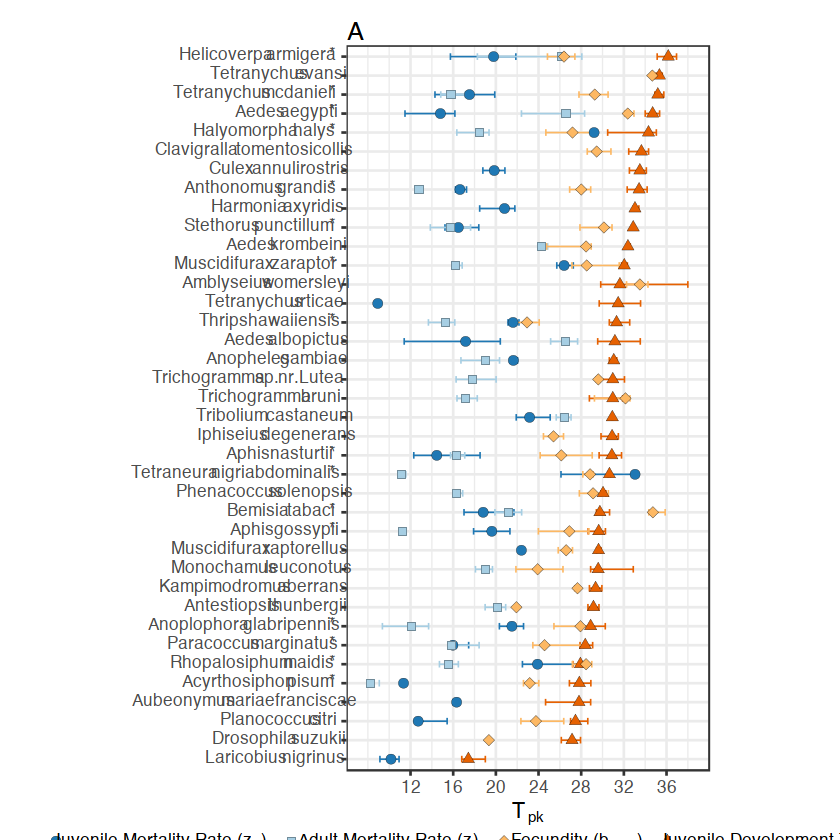

In [17]:
T_pksPlot <- ggplot(toptz, aes(estimate, species, shape=trait, colour=trait,fill=trait)) +
  geom_errorbar(aes(xmin = conf_lower, xmax = conf_upper),width=0.35,size=0.35) +
  geom_point(size = 2.5, col="#000000",stroke=0.1)+
  theme_bw(base_size = 12.5) +
  theme(axis.title.y = element_blank())+
  scale_x_continuous(expression(plain(paste("", italic(T)[pk]))),
                     limits =c(6,40),
                     expand = c(0, 0),
                     breaks=seq(12,36, by=4))+
  scale_fill_manual(labels = c(expression(plain(paste("Juvenile Mortality Rate (",italic(z[J]),")"))),
                               expression(plain(paste("Adult Mortality Rate (",italic(z),")"))),
                               expression(plain(paste("Fecundity (",italic(b[max]),")"))),
                               expression(plain(paste("Juvenile Development Time (",italic(alpha),")")))),
                    values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow = 1,ncol =4,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(labels = c(expression(plain(paste("Juvenile Mortality Rate (",italic(z[J]),")"))),
                                 expression(plain(paste("Adult Mortality Rate (",italic(z),")"))),
                                 expression(plain(paste("Fecundity (",italic(b[max]),")"))),
                                 expression(plain(paste("Juvenile Development Time (",italic(alpha),")")))),
                      values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=1,ncol=4,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  scale_shape_manual(labels = c(expression(plain(paste("Juvenile Mortality Rate (",italic(z[J]),")"))),
                                expression(plain(paste("Adult Mortality Rate (",italic(z),")"))),
                                expression(plain(paste("Fecundity (",italic(b[max]),")"))),
                                expression(plain(paste("Juvenile Development Time (",italic(alpha),")")))),
                     values = c(21,22,23,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow = 1,ncol =4,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  theme(legend.position = c(0.35,-0.1),legend.text = element_text(size = 10),
        axis.text.y = element_markdown(face = 'italic'))+
  theme(text=element_text(family="Times"))+
  theme(legend.margin=margin(t = -0.4, unit='cm'))+
  # coord_fixed(ratio = 1.5)
  theme(aspect.ratio=2)+
  ggtitle("A")+
  theme(plot.title=element_text(face="bold", size = 15, vjust = -1))

T_pksPlot

## Activation energies ($E$)

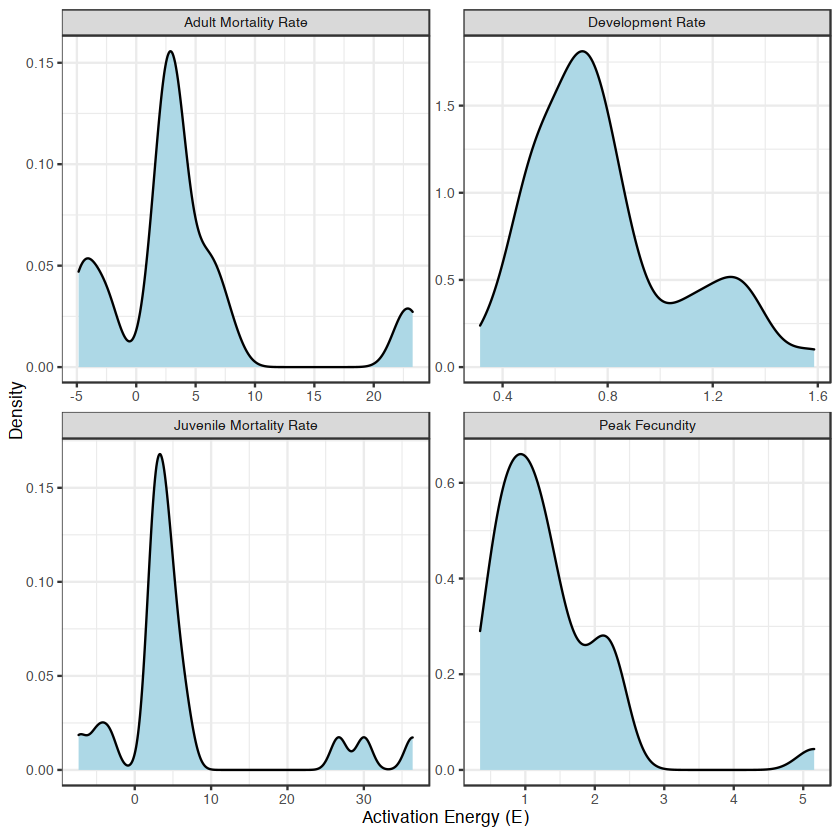

In [18]:
E <-  filter(topt, trait == 'juvenile development rate' | trait == 'fecundity rate', param =="e")  
Eh <- filter(topt, trait == 'juvenile mortality rate' | trait == 'adult mortality rate', param =="eh") %>%
  mutate(param=replace(param, param=='eh', 'e')) %>%
  filter(estimate > -8 & estimate < 50)

Eh[8,3] <- -7.36; Eh[23,3] <- -4.97; Eh[41,3] <- -4.55; Eh[22,3] <- -4.97
Eh[16,4] <- 36.393048; Eh[3,4] <- 30.027643

activation_e <- bind_rows(E, Eh) %>% 
  mutate(trait = case_when(trait =="adult mortality rate" ~ "Adult Mortality Rate",
                                         trait == "fecundity rate" ~ "Peak Fecundity",
                                         trait == "juvenile development rate" ~ "Development Rate",
                                         trait == "juvenile mortality rate" ~ "Juvenile Mortality Rate"))


eplot <- ggplot(activation_e, aes(x=estimate))+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Activation Energy (",italic(E),")"))),
                     # limits =c(-12,42),
                     # expand = c(0, 0)
                    ) +
  labs(y="Density")+
  geom_density(fill = "lightblue")+
  facet_wrap(.~trait, scales = "free")+
  theme(text = element_text(family = 'Times', size = 10))

eplot

ggsave("../results/SI/eDists.pdf",eplot, width = 8, height = 8, units = "cm")

In [19]:
#===============================================
# Mean activation energies 

activation_e <-  filter(topt, trait == 'juvenile development rate' |
                 trait == 'fecundity rate', param =="e")  

# change name to add asterisk to match next fig
activation_e$species <- as.character(activation_e$species)
activation_e$species[which(activation_e$species=="Anthonomus grandis")] <- "**Anthonomus grandis***"
activation_e$species[which(activation_e$species=="Paracoccus marginatus")] <- "**Paracoccus marginatus***"
activation_e$species[which(activation_e$species=="Aphis nasturtii")] <- "**Aphis nasturtii***"
activation_e$species[which(activation_e$species=="Tetraneura nigriabdominalis")] <- "**Tetraneura nigriabdominalis***"
activation_e$species[which(activation_e$species=="Muscidifurax zaraptor")] <- "**Muscidifurax zaraptor***"
activation_e$species[which(activation_e$species=="Rhopalosiphum maidis")] <- "**Rhopalosiphum maidis***"
activation_e$species[which(activation_e$species=="Aedes aegypti")] <- "**Aedes aegypti***"
activation_e$species[which(activation_e$species=="Helicoverpa armigera")] <- "**Helicoverpa armigera***"
activation_e$species[which(activation_e$species=="Thrips hawaiiensis")] <- "**Thrips hawaiiensis***"
activation_e$species[which(activation_e$species=="Tetranychus mcdanieli")] <- "**Tetranychus mcdanieli***"
activation_e$species[which(activation_e$species=="Halyomorpha halys")] <- "**Halyomorpha halys***"
activation_e$species[which(activation_e$species=="Bemisia tabaci")] <- "**Bemisia tabaci***"
activation_e$species[which(activation_e$species=="Aphis gossypii")] <- "**Aphis gossypii***"
activation_e$species[which(activation_e$species=="Anoplophora glabripennis")] <- "**Anoplophora glabripennis***"
activation_e$species[which(activation_e$species=="Stethorus punctillum")] <- "**Stethorus punctillum***"
activation_e$species[which(activation_e$species=="Acyrthosiphon pisum")] <- "**Acyrthosiphon pisum***"
activation_e <- mutate(activation_e,
                       trait = case_when(trait == "fecundity rate" ~ "Peak Fecundity",
                                         trait == "juvenile development rate" ~ "Development Time"))

In [20]:
TraitLevel <- c("Peak Fecundity", "Development Time" )
activation_e$trait  <- as.character(activation_e$trait)
activation_e$trait  <- factor(activation_e$trait, levels = TraitLevel)
activation_e$species <- as.character(activation_e$species)
activation_e$species <- factor(activation_e$species, levels=SPorder)
activation_e <- na.omit(activation_e)

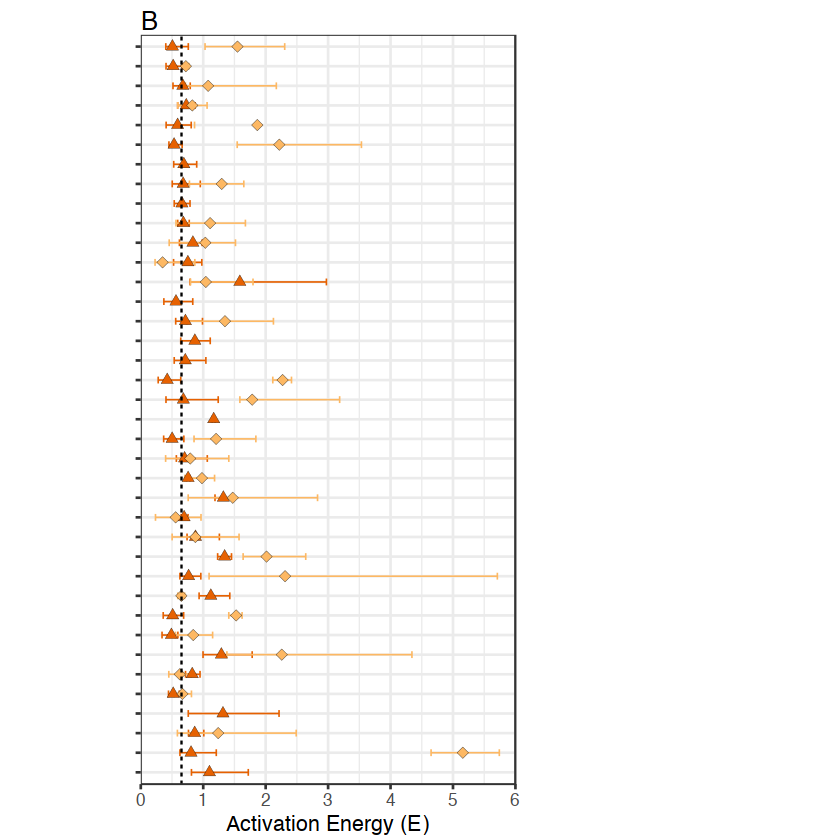

In [21]:
EsPlot <- ggplot(activation_e, aes(estimate, species, shape=trait, colour=trait,fill=trait)) +
  geom_errorbar(aes(xmin = conf_lower, xmax = conf_upper),width=0.35,size=0.35) +
  geom_point(size = 2.5, col="#000000",stroke=0.1)+
  theme_bw(base_size = 12.5) +
  theme(axis.title.y = element_blank())+
  scale_x_continuous(expression(plain(paste("Activation Energy (",italic(E),")"))),
                     limits =c(0,6),
                     expand = c(0, 0),
                     breaks=seq(0,6, by=1))+
  scale_fill_manual(values = c("#fdb863","#e66101"),
                    name=expression(bold("")))+
  scale_colour_manual(values = c("#fdb863","#e66101"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=1,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  scale_shape_manual(values = c(23,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow = 1,ncol =2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  theme(legend.position = 'none',legend.text = element_text(size = 8.5),
        axis.text.y = element_markdown(face = 'italic'))+
  theme(text=element_text(family="Times"))+
  theme(legend.margin=margin(t = -0.4, unit='cm'))+
  geom_vline(xintercept=0.65, lty ='dashed')+
  theme(axis.text.y=element_blank())+
  theme(plot.margin=margin(l=-4,unit="cm"))+
  theme(aspect.ratio=2)+
  ggtitle("B")+
  theme(plot.title=element_text(face="bold", size = 15, vjust = -1))

EsPlot

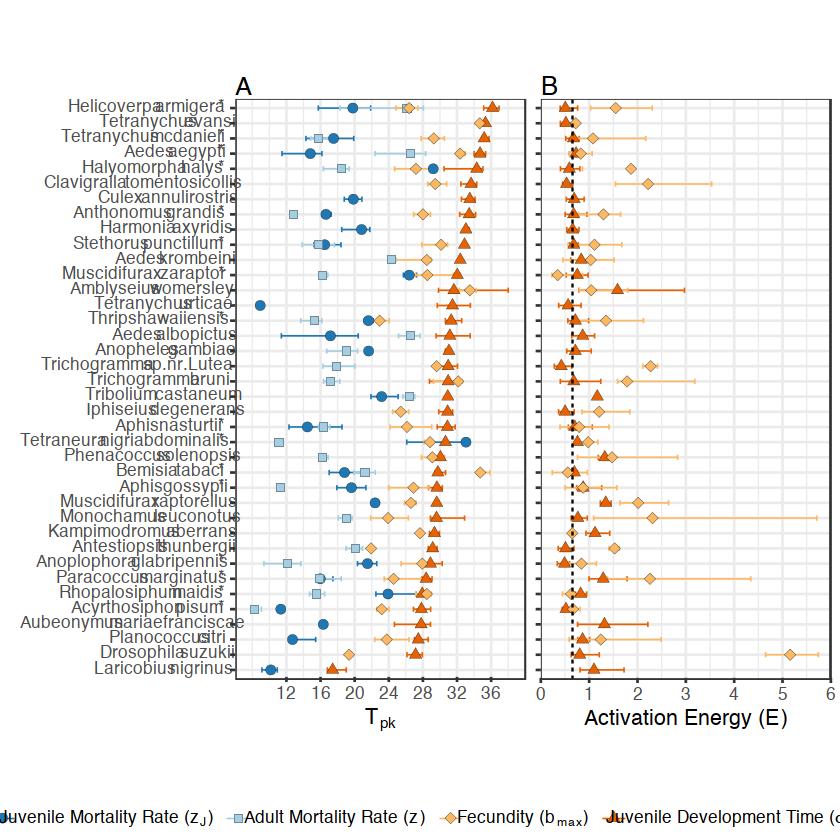

In [22]:
plotMain <- T_pksPlot + theme(legend.position="none") +
            EsPlot + theme(legend.position="none")

legend <- get_legend(T_pksPlot + theme(legend.position = "bottom"))

Tpks_Es_Plot <- plot_grid(plotMain, legend,ncol = 1, rel_heights = c(1, 0.05))

Tpks_Es_Plot

save_plot(Tpks_Es_Plot, file="../results/Figs/Tpks_Es_Plot.pdf", base_height=15,base_asp=1.5, units="cm")
